In [39]:
# This code was adapted from course material by Jenna Wiens (UMichigan).

import sys

In [40]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
# Please specify the full paths to the regression_train.csv
# and regression_test.csv files in your gdrive directory
### ========== TODO : START ========== ###
train_path = '/content/gdrive/My Drive/m146hw2/regression_train.csv'
test_path = '/content/gdrive/My Drive/m146hw2/regression_test.csv'
### ========== TODO : END ========== ###

In [42]:
# Use only the provided packages!
import os
import numpy as np
import matplotlib.pyplot as plt

In [43]:
######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        fig = plt.figure(figsize=(10, 5))
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

In [44]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [45]:
def plot_erms(mrange, train_errs, test_errs):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(mrange, train_errs, 'o-', color='red', label='Training')
    plt.plot(mrange, test_errs, 'o-', color='blue', label='Test')
    plt.xlabel(r'$m$', fontsize = 16)
    plt.ylabel(r'$E_{RMS}$', fontsize = 16)
    plt.title('Polynomial regression error')
    plt.legend()
    plt.show()

In [46]:
class PolynomialRegression() :
    
    def __init__(self, m=1) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        # part g: modify to create matrix for polynomial model
        Phi = X
        m = self.m_
        #Inserting a vector that has column size of 1 and row size of n which
        #corresponds with the row size of Phi
        #
        i = 2
        insert = np.ones((n, 1))
        Phi = np.append(insert, Phi, 1)
        while (i < m+1):
          Phi = np.append(Phi, np.power(X, i), 1)
          i = i + 1       
        return Phi
    
    
    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        
        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1/(1 + t) # change this line
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###
                
            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            # referenced for https://stackoverflow.com/questions/17784587/
            # gradient-descent-using-python-and-numpy for help
            hyp = np.dot(self.coef_, np.transpose(X))
            loss = hyp - y
            gradient = np.dot(np.transpose(X), loss)
            self.coef_ = self.coef_ - 2* eta * gradient
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(self.coef_, np.transpose(X)) # change this line
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)                
            ### ========== TODO : END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        
        print('number of iterations: %d' % (t+1))
        
        return self
    
    
    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            
        Returns
        --------------------        
            self    -- an instance of self
        """
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        term_1 = np.linalg.pinv(np.dot(np.transpose(X), X))
        term_2 = np.dot(term_1, np.transpose(X))
        term_3 = np.dot(term_2, y)
        self.coef_ = term_3
        ### ========== TODO : END ========== ###
        return self
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(self.coef_, np.transpose(X))
        ### ========== TODO : END ========== ###
        
        return y
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        y_val_pred = self.predict(X)
        cost = np.sum(np.square(y_val_pred -y))
        ### ========== TODO : END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        # self.cost(...) calculates J(θ).
        n = y.shape
        error = np.sqrt(self.cost(X, y)/n)
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


Visualizing data...


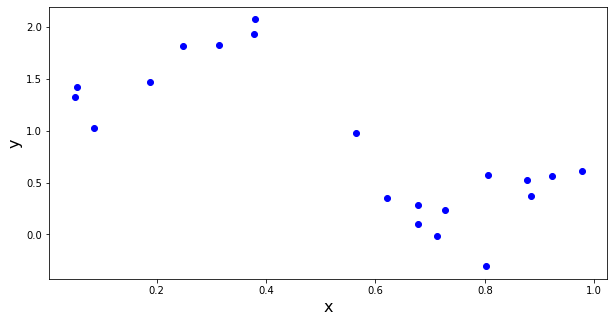

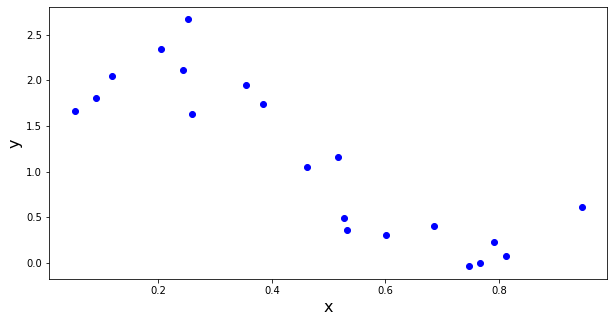

Investigating linear regression...

fit_GD using varied eta:
number of iterations: 10000
The coefficients are [0.36400847 0.09215787] and the cost is 25.86329625891011 for when eta is 1e-06
number of iterations: 10000
The coefficients are [ 1.15699657 -0.22522908] and the cost is 13.158898555756045 for when eta is 1e-05
number of iterations: 7020
The coefficients are [ 2.4464068 -2.816353 ] and the cost is 3.9125764057919463 for when eta is 0.001
number of iterations: 456
The coefficients are [ 2.44640704 -2.81635348] and the cost is 3.91257640579148 for when eta is 0.0168

fit:
The coefficients are [ 2.44640709 -2.81635359] and the cost is 3.912576405791464

fit_GD using set eta value:
number of iterations: 1731
The coefficients are [ 2.44640672 -2.81635284] when learning rate is the set
Investigating polynomial regression...
This is m_val [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
This is RMSE_Train [array([0.44229947]), array([0.44229947]), array([0.44131497]), array([0.24426922]), array([0

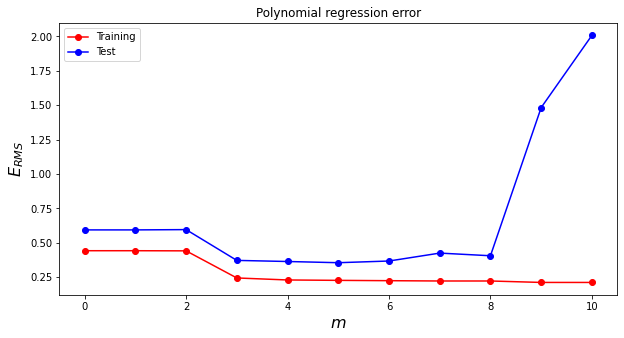

Done!


In [53]:
######################################################################
# main
######################################################################

def main():
    # load data
    train_data = load_data(train_path)
    test_data = load_data(test_path)
    
    
    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')
    plot_data(test_data.X, test_data.y)
    plot_data(train_data.X, train_data.y)
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')
    model = PolynomialRegression()  
    model.coef_ = np.zeros(2)
    eta = [1/np.power(10, 6), 1/np.power(10, 5), 1/np.power(10, 3), 0.0168]
          #[None, None, None, None]
    i = 0
    print("\nfit_GD using varied eta:")
    while (i < 4):
      object = model.fit_GD(train_data.X, train_data.y, eta[i])
      coef = object.coef_
      cost = object.cost(train_data.X, train_data.y)
      print("The coefficients are", coef, "and the cost is", cost, "for when eta is", eta[i])
      i = i + 1
    
    print("\nfit:")
    object = model.fit(train_data.X, train_data.y)
    cost = object.cost(train_data.X, train_data.y)
    print("The coefficients are", object.coef_, "and the cost is", cost)

    print("\nfit_GD using set eta value:")
    object = model.fit_GD(train_data.X, train_data.y)
    print("The coefficients are", object.coef_, "when learning rate is the set")
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('Investigating polynomial regression...')
    m_val = []
    RMSE_temp = None
    RMSE_Train = []
    RMSE_Test = []
    i = 0
    while (i < 11):
      #need to increase the value of the degrees by 1 until it reaches 10
      model = PolynomialRegression(m=i)
      model.coef_ = np.zeros(2)
      m_val.append(i)
      model.fit(train_data.X, train_data.y)
      RMSE_temp = model.rms_error(train_data.X, train_data.y)
      RMSE_Train.append(RMSE_temp)
      RMSE_temp = model.rms_error(test_data.X, test_data.y)
      RMSE_Test.append(RMSE_temp)
      i = i+1
    print("This is m_val",m_val)
    print("This is RMSE_Train",RMSE_Train)
    print("This is RMSE_Test", RMSE_Test)
    plot_erms(m_val, RMSE_Train, RMSE_Test)
    ### ========== TODO : END ========== ###
    
    
    print("Done!")

if __name__ == "__main__":
    main()
